In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds

In [ ]:
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteXNL49M/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteXNL49M/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteXNL49M/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [ ]:
train_data, test_data = imdb['train'], imdb['test']

In [ ]:
for item in train_data:
    print(item)
    break

(<tf.Tensor: shape=(163,), dtype=int64, numpy=
array([  62,   18,   41,  604,  927,   65,    3,  644, 7968,   21,   35,
       5096,   36,   11,   43, 2948, 5240,  102,   50,  681, 7862, 1244,
          3, 3266,   29,  122,  640,    2,   26,   14,  279,  438,   35,
         79,  349,  384,   11, 1991,    3,  492,   79,  122,  188,  117,
         33, 4047, 4531,   14,   65, 7968,    8, 1819, 3947,    3,   62,
         27,    9,   41,  577, 5044, 2629, 2552, 7193, 7961, 3642,    3,
         19,  107, 3903,  225,   85,  198,   72,    1, 1512,  738, 2347,
        102, 6245,    8,   85,  308,   79, 6936, 7961,   23, 4981, 8044,
          3, 6429, 7961, 1141, 1335, 1848, 4848,   55, 3601, 4217, 8050,
          2,    5,   59, 3831, 1484, 8040, 7974,  174, 5773,   22, 5240,
        102,   18,  247,   26,    4, 3903, 1612, 3902,  291,   11,    4,
         27,   13,   18, 4092, 4008, 7961,    6,  119,  213, 2774,    3,
         12,  258, 2306,   13,   91,   29,  171,   52,  229,    2, 1245,
    

In [ ]:
tokenizer = info.features['text'].encoder
print(tokenizer.subwords[:10])

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br']


In [ ]:
len(tokenizer.subwords)

7928

In [ ]:
string = "TensorFlow, from basics to mastery"

tokenized_string = tokenizer.encode(string)
print(tokenized_string)

[6307, 2327, 4043, 2120, 2, 48, 4249, 4429, 7, 2652, 8050]


In [ ]:
original_string = tokenizer.decode(tokenized_string)
print(original_string)

TensorFlow, from basics to mastery


In [ ]:
for token in tokenized_string:
    print("{} -> {}".format(token,tokenizer.decode([token])))

6307 -> Ten
2327 -> sor
4043 -> Fl
2120 -> ow
2 -> , 
48 -> from 
4249 -> basi
4429 -> cs 
7 -> to 
2652 -> master
8050 -> y


In [ ]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

# padded_batch
train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))

test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))


In [ ]:
type(train_dataset)

tensorflow.python.data.ops.dataset_ops.PaddedBatchDataset

In [ ]:
tokenizer.vocab_size

8185

In [15]:
embedding_dim = 64
max_length = 120
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')

])

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NUM_EPOCHS = 10

history = model.fit(train_dataset, validation_data=test_dataset,
 epochs=NUM_EPOCHS)

Epoch 1/10
391/391 [==============================] - 12s 26ms/step - loss: 0.6295 - accuracy: 0.6566 - val_loss: 0.4719 - val_accuracy: 0.8214
Epoch 2/10
391/391 [==============================] - 11s 26ms/step - loss: 0.3579 - accuracy: 0.8656 - val_loss: 0.3320 - val_accuracy: 0.8723
Epoch 3/10
391/391 [==============================] - 11s 26ms/step - loss: 0.2635 - accuracy: 0.9020 - val_loss: 0.3395 - val_accuracy: 0.8561
Epoch 4/10
391/391 [==============================] - 10s 26ms/step - loss: 0.2213 - accuracy: 0.9198 - val_loss: 0.3060 - val_accuracy: 0.8815
Epoch 5/10
391/391 [==============================] - 10s 25ms/step - loss: 0.1940 - accuracy: 0.9300 - val_loss: 0.3116 - val_accuracy: 0.8787
Epoch 6/10
391/391 [==============================] - 10s 25ms/step - loss: 0.1776 - accuracy: 0.9349 - val_loss: 0.3224 - val_accuracy: 0.8793
Epoch 7/10
391/391 [==============================] - 11s 26ms/step - loss: 0.1634 - accuracy: 0.9413 - val_loss: 0.3357 - val_accuracy:

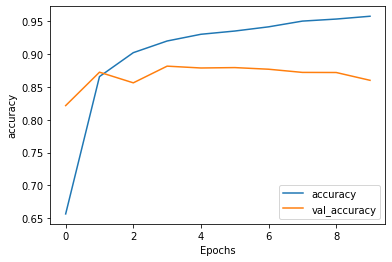

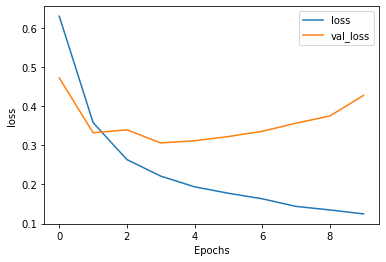

In [17]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_' + string])
    plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [18]:
embedding_dim = 16
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
                             tf.keras.layers.LSTM(64),
                             tf.keras.layers.Dense(32, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')

])

In [19]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NUM_EPOCHS = 10

history = model.fit(train_dataset, validation_data=test_dataset, epochs=NUM_EPOCHS)

Epoch 1/10
391/391 [==============================] - 34s 72ms/step - loss: 0.6932 - accuracy: 0.4979 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/10
391/391 [==============================] - 28s 70ms/step - loss: 0.6933 - accuracy: 0.4956 - val_loss: 0.6930 - val_accuracy: 0.5024
Epoch 3/10
391/391 [==============================] - 28s 71ms/step - loss: 0.6921 - accuracy: 0.5018 - val_loss: 0.6926 - val_accuracy: 0.4996
Epoch 4/10
391/391 [==============================] - 28s 69ms/step - loss: 0.6902 - accuracy: 0.5072 - val_loss: 0.6926 - val_accuracy: 0.5010
Epoch 5/10
391/391 [==============================] - 28s 71ms/step - loss: 0.6887 - accuracy: 0.5065 - val_loss: 0.6940 - val_accuracy: 0.5007
Epoch 6/10
391/391 [==============================] - 28s 70ms/step - loss: 0.6878 - accuracy: 0.5034 - val_loss: 0.6948 - val_accuracy: 0.5025
Epoch 7/10
391/391 [==============================] - 29s 73ms/step - loss: 0.6864 - accuracy: 0.5080 - val_loss: 0.6953 - val_accuracy:

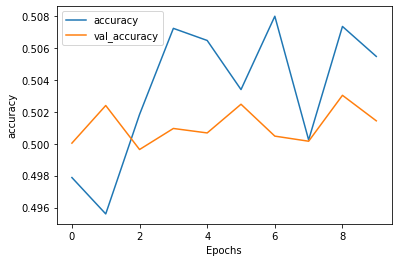

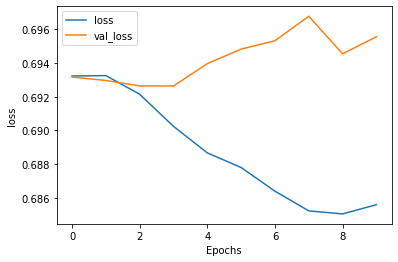

In [20]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [21]:
embedding_dim = 16
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                             tf.keras.layers.Dense(32, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')

])

In [22]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

NUM_EPOCHS = 10

history = model.fit(train_dataset, validation_data=test_dataset, epochs=NUM_EPOCHS)

Epoch 1/10
391/391 [==============================] - 54s 131ms/step - loss: 0.5906 - accuracy: 0.6779 - val_loss: 0.4920 - val_accuracy: 0.7676
Epoch 2/10
391/391 [==============================] - 50s 128ms/step - loss: 0.4112 - accuracy: 0.8238 - val_loss: 0.4832 - val_accuracy: 0.7984
Epoch 3/10
391/391 [==============================] - 50s 128ms/step - loss: 0.2989 - accuracy: 0.8830 - val_loss: 0.3860 - val_accuracy: 0.8319
Epoch 4/10
391/391 [==============================] - 50s 126ms/step - loss: 0.2653 - accuracy: 0.9002 - val_loss: 0.4273 - val_accuracy: 0.8474
Epoch 5/10
391/391 [==============================] - 50s 128ms/step - loss: 0.2210 - accuracy: 0.9207 - val_loss: 0.4300 - val_accuracy: 0.8320
Epoch 6/10
391/391 [==============================] - 50s 126ms/step - loss: 0.2424 - accuracy: 0.9062 - val_loss: 0.5656 - val_accuracy: 0.7418
Epoch 7/10
391/391 [==============================] - 50s 128ms/step - loss: 0.2398 - accuracy: 0.9083 - val_loss: 0.4882 - val_ac

KeyboardInterrupt: ignored

In [ ]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [ ]:
embedding_dim = 16
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64),return_sequences=True),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
                             tf.keras.layers.Dense(64, activation='relu'),
                             tf.keras.layers.Dense(1, activation='sigmoid')

])